In [11]:
import os
import pandas as pd
import numpy as np

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


In [15]:
diabetes = pd.read_csv("Diabetes_Data.csv")

In [16]:
diabetes.head(2)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1


In [18]:
labels = ["Number of Times Pregnant",
         "Plasma glucose concentration",
         "Diastolic bloood pressure(mm Hg)",
          "Triceps skin fold thickness (mm)",
          "2-house serum insulin (mu U/ml)",
          "Body Mass Index",
          "Diabetes pedigree function",
          "Age (years)",
          "Target"]

In [19]:
diabetics = pd.read_csv("Diabetes_data.csv",names=labels)

In [21]:
diabetics.head(2)
diabetics.tail(2)

,Number of Times Pregnant,Plasma glucose concentration,Diastolic bloood pressure(mm Hg),Triceps skin fold thickness (mm),2-house serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [23]:
diabetics['Target'] = diabetics['Target'].astype('category')

In [24]:
diabetics['Target'].value_counts()

0    500
1    268
Name: Target, dtype: int64

In [25]:
numeric_vars = diabetics.drop('Target',axis=1)

In [26]:
numeric_vars.head(2)

,Number of Times Pregnant,Plasma glucose concentration,Diastolic bloood pressure(mm Hg),Triceps skin fold thickness (mm),2-house serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [31]:
# Divide data into Train and test
X_train,X_test= train_test_split(numeric_vars, test_size = 0.2)
std = StandardScaler()
std.fit(X_train)

X_train_std=std.transform(X_train)
X_test_std =std.transform(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [35]:
# Number of Clusters
kmeans = KMeans(n_clusters=2, random_state = 14848641)
# fitting the inputdata
kmeans = kmeans.fit(X_train_std)

In [36]:
# Getting the clusters Labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[-0.5480536 , -0.24043743, -0.21369133,  0.172097  ,  0.07038195,
        -0.03988663,  0.02188385, -0.59345865],
       [ 0.94752378,  0.4156896 ,  0.36944857, -0.29753659, -0.12168257,
         0.06895955, -0.03783474,  1.02602407]])

In [38]:
labels_test = kmeans.predict(X_test_std)
# 1 indeicates - second clusters
# 0 indicates  - first clusters
## means points belongs to which clusters

In [39]:
labels_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [44]:
# # how can we come up with best K, Choosing Best K logic 
wss = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_
    

In [45]:
wss

{1: 4912.0,
 2: 4070.5498822569525,
 3: 3475.2411066753402,
 4: 3109.08005515532,
 5: 2867.705337864684,
 6: 2656.628831674757,
 7: 2478.4224185474104,
 8: 2369.669504595964,
 9: 2256.0292690573638,
 10: 2164.301157477656,
 11: 2084.9646416606265,
 12: 2015.3762166457589,
 13: 1968.4225217678681,
 14: 1887.0900098821749}

Text(0.5, 1.0, 'Choosing optimal K')

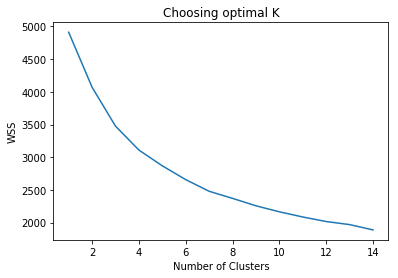

In [46]:
plt.figure()
plt.plot(list(wss.keys()),list(wss.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.title("Choosing optimal K")

In [52]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [54]:
X_train_std = pd.DataFrame(X_train_std)

In [55]:
X_train_std.shape


(614, 8)

In [57]:
indices = X_train_std.sample(frac=0.9, random_state=1234).index

In [59]:
Alpha = X_train_std.iloc[indices,:]

In [60]:
Alpha.head(6)

,0,1,2,3,4,5,6,7
163,1.254698,0.126609,0.333568,0.223016,4.378312,-0.432124,0.597561,1.595611
290,-1.128549,-0.690360,0.642095,-0.350186,0.030111,-0.874753,-0.527889,-0.953934
568,-0.532737,0.126609,-0.077802,0.477772,1.049747,0.099030,1.142882,-0.274055
356,-0.234831,0.095187,1.567677,0.923595,1.344684,3.184785,1.157386,-0.953934
435,-0.830643,0.723624,0.230726,0.095637,-0.163704,-0.748288,-0.652617,-1.038919
300,-1.128549,0.566514,-3.574445,-1.305522,-0.677735,0.529012,1.311120,-0.698980


In [66]:
## apply kmeans on full custer data points and 90% of random data points and make sure that data points are correctedly clustered
## with full data points and random sample of datapoints.
kmeans = KMeans(n_clusters = 2)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus'] = kmeans1.labels_
X_train_std

614


,0,1,2,3,4,5,6,7,clus
0,2.744227,-1.381640,-0.489172,-1.305522,-0.677735,0.086384,-0.873066,0.660778,0
1,-1.128549,0.535093,-0.077802,-0.413875,0.569423,-0.925339,-0.980390,-1.038919,1
2,-0.532737,-0.438985,-0.694857,0.414083,0.712678,-0.394185,-0.159507,-0.953934,1
3,-1.128549,0.252296,-0.077802,-0.095430,0.839079,-0.204487,2.639615,-0.698980,1
4,-1.128549,0.660780,0.744938,0.350394,-0.677735,0.035798,-0.139203,-0.953934,1
5,0.063075,1.666279,0.025041,-0.413875,0.737958,-0.305659,-0.348049,-0.019101,0
6,-0.532737,0.095187,-1.106226,0.732528,0.712678,1.262512,0.113153,-0.613995,1
7,1.254698,1.477748,1.876205,1.624175,1.268843,0.693417,-0.916575,0.830748,0
8,-1.128549,2.169029,1.773362,0.286705,-0.677735,0.276082,-0.133401,0.660778,0
9,2.446321,0.032343,0.436410,-0.222808,-0.677735,-0.710348,-0.643915,2.445460,0


In [67]:
kmeans2 = kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus'] = kmeans2.labels_

553


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
g1 = X_train_std.loc[indices,'clus']
g1.shape
g2 = Alpha.loc[indices,'clus']
g2.shape


(553,)

In [72]:
adjusted_rand_score(g1,g2)

0.9566952851865727